<div class="alert alert-block alert-info"><strong>Content</strong></div>
<div class="list-group">
    <a class="list-group-item list-group-item-action" href="#imports">Imports</a>
    <a class="list-group-item list-group-item-action" href="#collection">Data Collection</a>
    <a class="list-group-item list-group-item-action" href="#processing">Data Processing</a>
    <a class="list-group-item list-group-item-action" href="#modeling">Modeling</a>
    <a class="list-group-item list-group-item-action" href="#evaluation">Model Evaluation</a>
    <a class="list-group-item list-group-item-action" href="#shap">SHAP</a>
    <a class="list-group-item list-group-item-action" href="#shaplocal">SHAP Local</a>
    <a class="list-group-item list-group-item-action" href="#shapglobal">SHAP Global</a>
    
</div>

<div class="alert alert-block alert-success" id='imports'><strong>Imports</strong></div>

In [1]:
#imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder # transform categorical data
from sklearn.tree import DecisionTreeClassifier # Model for case 2
from sklearn.metrics import classification_report, accuracy_score # metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split # model validation
from sklearn.tree import plot_tree

import shap

%matplotlib inline

<div class="alert alert-block alert-success" id='collection'><strong>Data Collection</strong></div>

In [2]:
data = pd.read_csv('src/ObesityDataSet_raw_and_data_sinthetic.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

<div class="alert alert-block alert-success" id='processing'><strong>Data Processing</strong></div>

In [3]:
# height and weight highly correlated to BMI (target based)
data = data.drop(columns=['Height', 'Weight'])

In [4]:
data.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
# group categorical data and create encoded data version
columns = ["Gender", "family_history_with_overweight", "FAVC", 
           "CAEC", "SMOKE", "SCC", "CALC", "MTRANS", "NObeyesdad"]
for col in columns:
    data[col] = data[col].astype('category')
    
data_enc = data.copy()

In [6]:
# transform categorical data to numberical
category = ['Gender','family_history_with_overweight', 'FAVC', 'CAEC',
           'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']
encoder_list = []
for c in category:
    encoder = LabelEncoder()
    data_enc[c] = encoder.fit_transform(data_enc[c])
    encoder_list.append(encoder)
    
data_enc.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22.0,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6


In [7]:
# split data
X, y = data_enc.iloc[:,:-1], data_enc.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=1) 

<div class="alert alert-block alert-success" id='modeling'><strong>Modeling</strong></div>

In [8]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

<div class="alert alert-block alert-success" id='evaluation'><strong>Model Evaluation</strong></div>

In [9]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy score', accuracy)

Accuracy score 0.75177304964539


In [10]:
y_test_inv = encoder_list[-1].inverse_transform(y_test)
y_pred_inv = encoder_list[-1].inverse_transform(y_pred)
print(classification_report(y_test_inv,y_pred_inv))

                     precision    recall  f1-score   support

Insufficient_Weight       0.85      0.87      0.86        61
      Normal_Weight       0.52      0.64      0.57        45
     Obesity_Type_I       0.81      0.70      0.75        79
    Obesity_Type_II       0.83      0.83      0.83        54
   Obesity_Type_III       0.98      0.98      0.98        63
 Overweight_Level_I       0.62      0.54      0.58        61
Overweight_Level_II       0.61      0.68      0.65        60

           accuracy                           0.75       423
          macro avg       0.75      0.75      0.75       423
       weighted avg       0.76      0.75      0.75       423



In [11]:
# print 5 samples to compare prediction and true value
for i in range(5):
    result = False
    if y_test.iloc[i] ==  y_pred[i]:
        result = True
    print(i, result, y_test.iloc[i], y_pred[i], y_pred_inv[i])

0 True 0 0 Insufficient_Weight
1 False 1 2 Obesity_Type_I
2 False 5 0 Insufficient_Weight
3 True 4 4 Obesity_Type_III
4 True 3 3 Obesity_Type_II


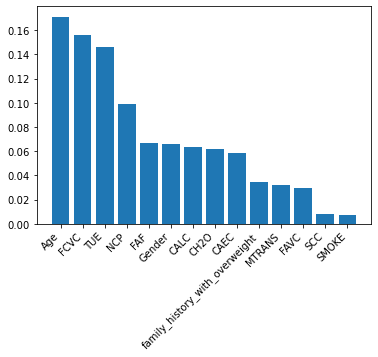

In [12]:
# Gets the gini importance
feature_imp = pd.Series(model.feature_importances_, 
                        index=X.columns).sort_values(ascending=False)
plt.bar(feature_imp.index, feature_imp)
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

In [13]:
print('Gini importance:\n')
feature_imp

Gini importance:



Age                               0.171175
FCVC                              0.155735
TUE                               0.146429
NCP                               0.098822
FAF                               0.066852
Gender                            0.065780
CALC                              0.063354
CH2O                              0.061888
CAEC                              0.058354
family_history_with_overweight    0.034751
MTRANS                            0.032027
FAVC                              0.029762
SCC                               0.007832
SMOKE                             0.007240
dtype: float64

# Use confusion matrix
Used to analyze target predictions

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


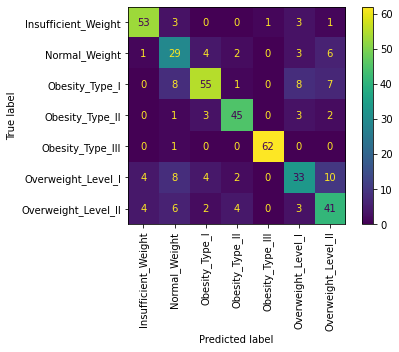

In [14]:
class_names = ['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_II', 
               'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II']
disp = plot_confusion_matrix(model, X_test, y_test, display_labels=class_names, 
                             xticks_rotation='vertical')

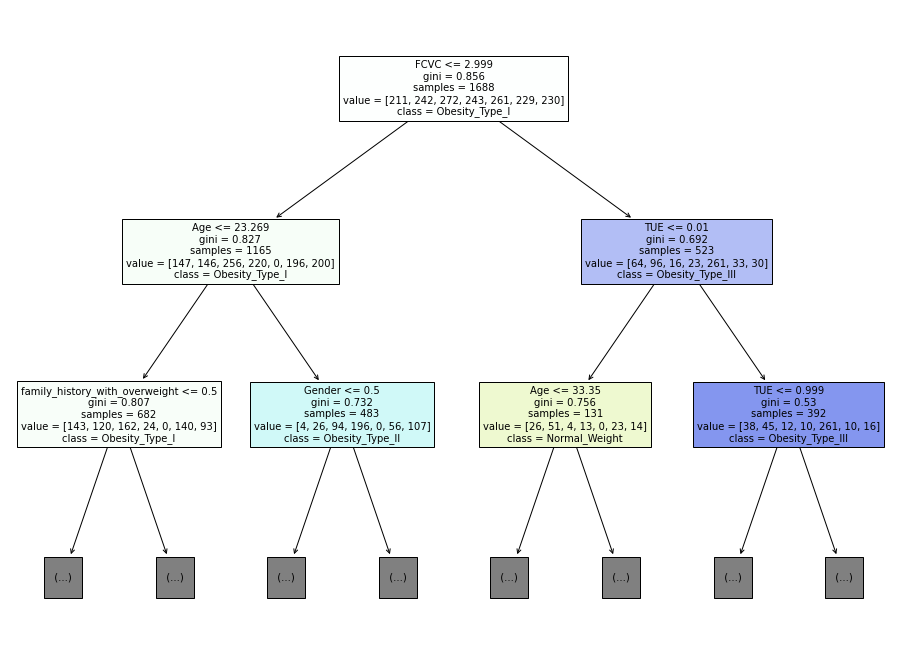

In [15]:
# visualize top of the decision tree and its splits
class_names = data.iloc[:,-1].dtypes.categories.to_list()
plt.figure(figsize=(16,12))
plot_tree(model, feature_names=X.columns, max_depth=2, class_names=class_names, fontsize=10, filled=True)
plt.show()

<div class="alert alert-block alert-success" id='shap'><strong>SHAP</strong></div>

In [16]:
explainer = shap.TreeExplainer(model, X)
shap_values = explainer(X)

In [17]:
print('shap shape', np.shape(shap_values))

shap shape (2111, 14, 7)


<div class="alert alert-block alert-success" id='shaplocal'><strong>SHAP Local</strong></div>

In [18]:
# print data sample to be explained
sample = 5
print('data sample', sample)
data.iloc[sample,:]

data sample 5


Gender                                     Male
Age                                        29.0
family_history_with_overweight               no
FAVC                                        yes
FCVC                                        2.0
NCP                                         3.0
CAEC                                  Sometimes
SMOKE                                        no
CH2O                                        2.0
SCC                                          no
FAF                                         0.0
TUE                                         0.0
CALC                                  Sometimes
MTRANS                               Automobile
NObeyesdad                        Normal_Weight
Name: 5, dtype: object

In [19]:
# show shap values for the predicted target (1)
shap_values[sample,:,1]

.values =
array([ 0.11469048, -0.01871826,  0.36397223, -0.0005119 ,  0.22784524,
        0.01250794, -0.00084921,  0.        ,  0.01438889,  0.01709524,
       -0.01351587,  0.16529365,  0.00215079, -0.00434921])

.base_values =
0.12

.data =
array([ 1., 29.,  0.,  1.,  2.,  3.,  2.,  0.,  2.,  0.,  0.,  0.,  2.,
        0.])

In [20]:
print('Actual value = ', y[sample], class_names[y[sample]])
sample_pred = model.predict(X.iloc[sample:sample+1,:])[0]
print('Predicted value = ', sample_pred, class_names[sample_pred])

Actual value =  1 Normal_Weight
Predicted value =  1 Normal_Weight


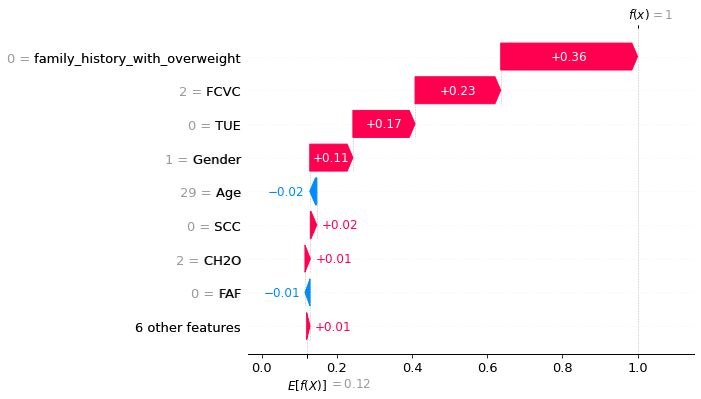

In [21]:
# note that the third index on the shap values paramter
# indicates the index of the class predicted in the explainer
shap.initjs()
shap.plots.waterfall(shap_values[sample,:,1], max_display=9)

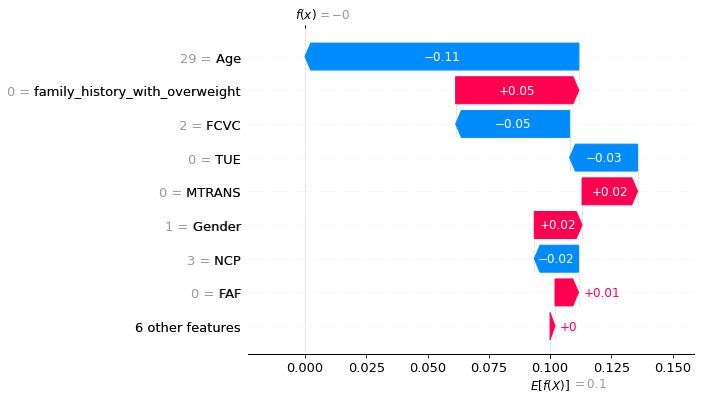

In [22]:
# this is an explanation for a class that was not predicted
shap.plots.waterfall(shap_values[sample,:,0], max_display=9)

<div class="alert alert-block alert-success" id='shapglobal'><strong>SHAP Global</strong></div>

In [23]:
np.shape(shap_values)

(2111, 14, 7)

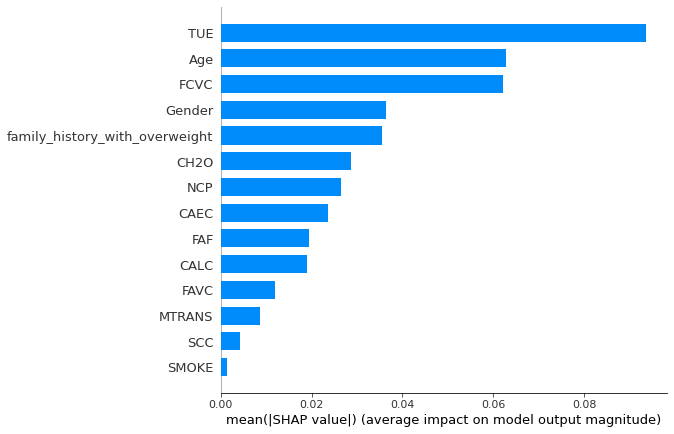

In [24]:
# bar plot to explain global scope
target_class = ['Insufficient_Weight',
                 'Normal_Weight',
                 'Obesity_Type_I',
                 'Obesity_Type_II',
                 'Obesity_Type_III',
                 'Overweight_Level_I',
                 'Overweight_Level_II']
shap.summary_plot(shap_values.values[:,:,1], X.values, plot_type="bar", class_names=target_class, 
                 feature_names=X.columns)

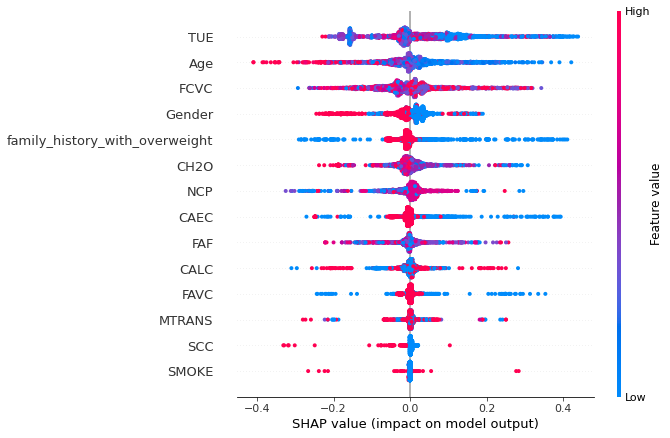

In [25]:
# beesawarm plot
shap.summary_plot(shap_values[:,:,1], X.values, class_names=target_class, 
                 feature_names=X.columns)

In [26]:
#global force plot
shap.initjs()
shap.force_plot(base_value=explainer.expected_value[6], 
                shap_values=np.array(shap_values).reshape(2111,14,7)[:,:,6], 
                feature_names=X.columns)

ValueError: Unsupported dtype object